<a href="https://colab.research.google.com/github/alupo933/Python-Work-for-Bootcamp/blob/main/(Resubmit)_Logistic%2C_Random_forest%2C_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')

In [2]:
filename ='/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/Wine_cultivars.csv'
wine = pd.read_csv(filename)
wine.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Text(0.5, 0, 'Color Intesnsity')

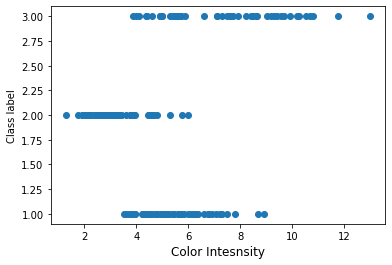

In [3]:
plt.scatter(wine['Color intensity'], wine['Class label'])
plt.ylabel('Class label')
plt.xlabel('Color Intesnsity', fontsize = 12)

In [4]:
X = wine.drop(columns='Class label')
y = wine['Class label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#1) Use a logistic regression model and try both l1 and l2 regularization.

In [5]:
# Make a logistic Regression anstance of the madel with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scalar 
scaler = StandardScaler()
# Put scaler and model on a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Fit and train the model on the data, storing the information learned from the data
logreg_pipe.fit(X_train, y_train)
print('Training score')
print(logreg_pipe.score(X_train, y_train))
print('Testing score')
print(logreg_pipe.score(X_test, y_test))

Training score
1.0
Testing score
0.9777777777777777


#L1 Tuning

{0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

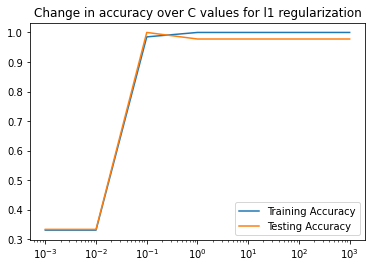

In [6]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100 ,1000]
train_scores = []
test_scores = []

# iterative over the c values
for c in c_values:

  # Instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # Add the training and testing scores to the scores list
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

# Plot the change in accuracy as the value of C changes
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

# set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# Print a dictionary of values of C and accuracy Scores
{c:score for c, score in zip(c_values, test_scores)}

With L1 tuning, we can see our best test scores are at 0.1

# L2 Tuning


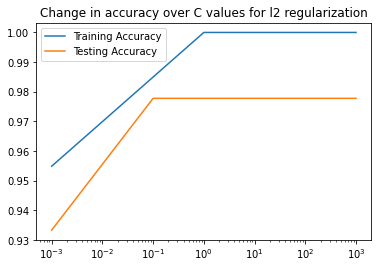

In [7]:
# Create a list of c vlaues and empty lists for scores
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# Iterative over the c values
for c in c_values:
  #instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe2 = make_pipeline(scaler, log_reg)
  log_reg_pipe2.fit(X_train, y_train)

  # add the training and testing scores to the scores list
  train_scores.append(log_reg_pipe2.score(X_train, y_train))
  test_scores.append(log_reg_pipe2.score(X_test, y_test))

# Plot the change in accuracy as the value of C changes
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

# Set the X axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# Print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)};

In [8]:
wine.dtypes

Class label                       int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavonid phenols             float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [9]:
data_types_dict = {'Class label': float,
                   'Magnesium': float,
                   'Proline': float}
wine = wine.astype(data_types_dict)

In [10]:
wine.dtypes

Class label                     float64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                       float64
Total phenols                   float64
Flavanoids                      float64
Nonflavonid phenols             float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                         float64
dtype: object

With L2 tuning we can see our best test score is at 0.1 and higher

Comparatively L1 shows better results in test scores, but it is overfit

#2) After doing that, try using KNN and Random Forest models.

In [11]:
# KNN Model first
# Instantiate the model
knn = KNeighborsClassifier()
# Create a pipeline with Scaler
knn_pipe = make_pipeline(scaler, knn)
#Fit the Pipeline
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [12]:
# Evaluate the accuracy
Knn_pipe_train_pred = knn_pipe.predict(X_train)
print(accuracy_score(y_train, Knn_pipe_train_pred))

0.9774436090225563


In [13]:
Knn_pipe_test_pred = knn_pipe.predict(X_test)
print(accuracy_score(y_test, Knn_pipe_test_pred))

0.9555555555555556


In [14]:
# Call the paramters
knn_pipe.get_params()

{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

In [15]:
# Test Parameters
parameter_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
                  'kneighborsclassifier__weights' : ['uniform', 'distance'],
                  'kneighborsclassifier__p' : range(1,5)}

In [16]:
# Instantiate a gridsearch with the model and hyper parameter diectionary
grid = GridSearchCV(knn_pipe, parameter_grid, error_score='raise')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}


In [17]:
# Check the optimal combinations of hyperparameters
best_knn = grid.best_estimator_
best_knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(p=1))])

In [18]:
# Run a classification reprot on both train and test datasets for the best model
knn_train_pred = best_knn.predict(X_train)
knn_test_pred = best_knn.predict(X_test)
print('Best Model Train Metrics')
print(classification_report(y_train, knn_train_pred))
print('Best Model Test Metrics')
print(classification_report(y_test, knn_test_pred))

Best Model Train Metrics
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        44
           2       1.00      0.96      0.98        53
           3       0.97      1.00      0.99        36

    accuracy                           0.98       133
   macro avg       0.98      0.99      0.99       133
weighted avg       0.99      0.98      0.98       133

Best Model Test Metrics
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [19]:
print('Best Model Train Metrics')
print(accuracy_score(y_train, knn_train_pred))
print('\nBest Model Test Metrics')
print(accuracy_score(y_test, knn_test_pred))

Best Model Train Metrics
0.9849624060150376

Best Model Test Metrics
0.9555555555555556


#Random Forest

In [21]:
# Import the Random Forest Regress
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Make an instance of the Model and use Default Parameters to start
randomforest = RandomForestRegressor(random_state=42)

In [24]:
# Next we'll look at the hyperparameters and see what are tunable
randomforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [25]:
# now we'll train the model on the data
randomforest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Next we predict the target
randomforest.predict(X_test)

array([1.  , 1.  , 2.4 , 1.01, 2.01, 1.  , 2.  , 2.98, 1.98, 1.97, 1.2 ,
       2.35, 1.  , 2.47, 1.  , 2.  , 2.  , 2.  , 1.  , 2.  , 1.  , 1.89,
       2.18, 3.  , 3.  , 3.  , 1.99, 1.85, 2.  , 1.  , 1.03, 2.  , 2.87,
       1.  , 1.03, 1.  , 2.83, 3.  , 1.88, 2.93, 1.08, 2.01, 2.  , 2.14,
       2.77])

In [28]:
# Now We'll Evaluate the performance of the model
randomforest_train_score = randomforest.score(X_train, y_train)
randomforest_test_score = randomforest.score(X_test, y_test)
print(randomforest_train_score)
print(randomforest_test_score)

0.9903771180030257
0.9134962686567164


In [31]:
parameter_grid2 = {'max_depth': range(1,10),
                  'n_estimators' : range(50,150,5)}

In [32]:
# Instantiate a gridsearch with the model and hyper parameter diectionary
grid2 = GridSearchCV(randomforest, parameter_grid, error_score='raise')
grid2.fit(X_train, y_train)
print(grid2.best_params_)

{'max_depth': 6, 'n_estimators': 115}


In [33]:
# Check the optimal combinations of hyperparameters
best_randomforest = grid2.best_estimator_
best_randomforest

RandomForestRegressor(max_depth=6, n_estimators=115, random_state=42)

In [36]:
#Now that we have the optimal combinations of hyperparameters, we will run tune to them in our model
randomforest_6 = RandomForestRegressor(max_depth=6, n_estimators=115, random_state=42)
randomforest_6.fit(X_train, y_train)
randomforest_6_train_score = randomforest_6.score(X_train, y_train)
randomforest_6_test_score = randomforest_6.score(X_test, y_test)
print(randomforest_6_train_score)
print(randomforest_6_test_score)

0.9903730956990754
0.9162316959625314


In [ ]:
print('Best Model Train Metrics')
print(accuracy_score(y_train, randomforest_train_pred))
print('\nBest Model Test Metrics')
print(accuracy_score(y_test, randomforest_test_pred))

The KNN Model performed best. The hyper parameters I tuned were neighbors, classifiers and weights. The training score was a little low than the randomforest regress (98% vs. 99%), but the testing score was much better (94% vs 91%).

The hyperparameters I tuned in my randomforest model were the n_estimators 

Evaluation: my model improved on the training metrics by 1.7%.

MY model can accurately predict Class 1 by 94%.

My model is able to clearly predict whether or not the grape will be class type 2 by it's attributes at a rate of 100%. 

My model can accurately predict Class 3 at a rate of 92%.